<a href="https://colab.research.google.com/github/fadillarizalul/goodreads-recommender/blob/main/goodreads_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYEK MACHINE LEARNING - SISTEM REKOMENDASI

Proyek ini merupakan sistem rekomendasi untuk suatu buku di Goodreads dengan menggunakan pengembangan model Content-based Filtering. Dataset didapatkan dari goodreads Kaggle.

In [ ]:
# Mount dataset in drive google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Understanding

In [ ]:
# Import library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
# Load and Read the data

ratings = pd.read_csv("/content/drive/MyDrive/Dataset/Goodreads/ratings.csv")
books = pd.read_csv("/content/drive/MyDrive/Dataset/Goodreads/books.csv")

In [ ]:
# Preview lima data teratas dari dataset books

books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1.0,2767052.0,2767052.0,2792775.0,272.0,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653.0,4942365.0,155254.0,66715.0,127936.0,560092.0,1481305.0,2706317.0,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2.0,3.0,3.0,4640799.0,491.0,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479.0,4800065.0,75867.0,75504.0,101676.0,455024.0,1156318.0,3011543.0,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3.0,41865.0,41865.0,3212258.0,226.0,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839.0,3916824.0,95009.0,456191.0,436802.0,793319.0,875073.0,1355439.0,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4.0,2657.0,2657.0,3275794.0,487.0,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671.0,3340896.0,72586.0,60427.0,117415.0,446835.0,1001952.0,1714267.0,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5.0,4671.0,4671.0,245494.0,1356.0,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664.0,2773745.0,51992.0,86236.0,197621.0,606158.0,936012.0,947718.0,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
# Melihat informasi dari fitur yang ada di dataset books

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5000 non-null   float64
 1   book_id                    5000 non-null   float64
 2   best_book_id               5000 non-null   float64
 3   work_id                    5000 non-null   float64
 4   books_count                5000 non-null   float64
 5   isbn                       4745 non-null   object 
 6   isbn13                     4784 non-null   float64
 7   authors                    5000 non-null   object 
 8   original_publication_year  4991 non-null   float64
 9   original_title             4819 non-null   object 
 10  title                      5000 non-null   object 
 11  language_code              4619 non-null   object 
 12  average_rating             5000 non-null   float64
 13  ratings_count              5000 non-null   floa

In [ ]:
# Melihat ukuran dataset books

books.shape

(10000, 23)

In [ ]:
# Preview lima data teratas dari dataset ratings

ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
# Melihat informasi dari fitur yang ada di dataset ratings

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   book_id  5000 non-null   int64
 1   user_id  5000 non-null   int64
 2   rating   5000 non-null   int64
dtypes: int64(3)
memory usage: 117.3 KB


# Data Preprocessing

In [ ]:
# Cek missing value dengan fungsi isnull()
books.isnull().sum()

id                           5000
book_id                      5000
best_book_id                 5000
work_id                      5000
books_count                  5000
isbn                         5255
isbn13                       5216
authors                      5000
original_publication_year    5009
original_title               5181
title                        5000
language_code                5381
average_rating               5000
ratings_count                5000
work_ratings_count           5000
work_text_reviews_count      5000
ratings_1                    5000
ratings_2                    5000
ratings_3                    5000
ratings_4                    5000
ratings_5                    5000
image_url                    5000
small_image_url              5000
dtype: int64

In [ ]:
# Cek missing value dengan fungsi isnull()
ratings.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

# Data Preparation

## Handle Missing Value

In [ ]:
# Membersihkan missing value dengan fungsi dropna()
books_clean = books.dropna()
books_clean.isnull().sum()

id                           0
book_id                      0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64

In [ ]:
# Menggabungkan dataframe books_clean dengan ratings dan memasukkannya ke dalam variabel all_book
all_book = pd.merge(books_clean, ratings, on='book_id', how='left')
all_book.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id,rating
0,1.0,2767052.0,2767052.0,2792775.0,272.0,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653.0,4942365.0,155254.0,66715.0,127936.0,560092.0,1481305.0,2706317.0,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,NaN,NaN
1,2.0,3.0,3.0,4640799.0,491.0,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479.0,4800065.0,75867.0,75504.0,101676.0,455024.0,1156318.0,3011543.0,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,314.0,3.0
2,2.0,3.0,3.0,4640799.0,491.0,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479.0,4800065.0,75867.0,75504.0,101676.0,455024.0,1156318.0,3011543.0,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,588.0,1.0
3,2.0,3.0,3.0,4640799.0,491.0,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479.0,4800065.0,75867.0,75504.0,101676.0,455024.0,1156318.0,3011543.0,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2077.0,2.0
4,2.0,3.0,3.0,4640799.0,491.0,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479.0,4800065.0,75867.0,75504.0,101676.0,455024.0,1156318.0,3011543.0,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2487.0,3.0


In [ ]:
# Mengonversi data series book_id menjadi dalam bentuk list
book_id = all_book['book_id'].tolist()
 
# Mengonversi data series title menjadi dalam bentuk list
book_name = all_book['title'].tolist()
 
# Mengonversi data series authors menjadi dalam bentuk list
book_cuisine = all_book['authors'].tolist()
 
print(len(book_id))
print(len(book_name))
print(len(book_cuisine))

6115
6115
6115


In [ ]:
# Membuat dictionary untuk data ‘book_id’, ‘title’, dan ‘authors’
book_new = pd.DataFrame({
    'book_id': book_id,
    'title': book_name,
    'authors': book_cuisine
})
book_new

,book_id,title,authors
0,2767052.0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
1,3.0,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré"
2,3.0,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré"
3,3.0,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré"
4,3.0,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré"
...,...,...,...
6110,3993839.0,"Patient Zero (Joe Ledger, #1)",Jonathan Maberry
6111,545951.0,Death Comes for the Archbishop,Willa Cather
6112,17312201.0,The Son of Sobek (Percy Jackson & Kane Chronic...,Rick Riordan
6113,52823.0,Tartuffe,"Molière, Martin Sorrell"


# Model Development dengan Content-based

## TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data authors
tf.fit(book_new['authors']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

['aaron',
 'aaronovitch',
 'ab',
 'abagnale',
 'abbey',
 'abbi',
 'abbott',
 'abby',
 'abdul',
 'abel',
 'abercrombie',
 'abraham',
 'acevedo',
 'achebe',
 'ackerman',
 'ackroyd',
 'adam',
 'adams',
 'addison',
 'adeline',
 'adichie',
 'adiga',
 'adlard',
 'adler',
 'adolf',
 'adolph',
 'adorf',
 'adornetto',
 'adrian',
 'adriana',
 'aeschylus',
 'aesop',
 'agassi',
 'agatha',
 'agnete',
 'aguirre',
 'ahdieh',
 'ahern',
 'ai',
 'aimee',
 'aja',
 'ajvide',
 'akira',
 'al',
 'alaa',
 'alabort',
 'alan',
 'alastair',
 'albanese',
 'albee',
 'albert',
 'albertalli',
 'albom',
 'albus',
 'alcott',
 'aldiss',
 'aldous',
 'aleatha',
 'alec',
 'aleida',
 'aleksandr',
 'alethea',
 'alev',
 'alex',
 'alexander',
 'alexandra',
 'alexandre',
 'alexie',
 'alfred',
 'ali',
 'alice',
 'alighieri',
 'alison',
 'allan',
 'allard',
 'allen',
 'allende',
 'allison',
 'allred',
 'allsburg',
 'ally',
 'alpert',
 'alphona',
 'alsanousi',
 'alvarez',
 'alvin',
 'alyson',
 'amanda',
 'amaro',
 'ambroise',
 'a

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(book_new['authors']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(6115, 3485)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan authors
# Baris diisi dengan judul buku
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=book_new.title
).sample(22, axis=1).sample(10, axis=0)

,gorey,spinelli,la,bowen,michelle,bacigalupi,zevin,leah,campbell,scott,felicia,patti,chopra,morgan,barbara,bushnell,remini,salten,anton,stead,hisaya,slash
title,,,,,,,,,,,,,,,,,,,,,,
The Tiger's Wife,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Salem Falls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Prodigal God: Recovering the Heart of the Christian Faith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Winter Prey (Lucas Davenport, #5)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
What Happened to Goodbye,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Seven Up (Stephanie Plum, #7)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Dragonflight (Dragonriders of Pern, #1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Zen Mind, Beginner's Mind: Informal Talks on Zen Meditation and Practice",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

Pada tahap sebelumnya, kita telah berhasil mengidentifikasi korelasi antara judul buku dengan kategori penulisnya. Sekarang, kita akan menghitung derajat kesamaan (similarity degree) antar judul buku dengan teknik cosine similarity. Di sini, kita menggunakan fungsi cosine_similarity dari library sklearn. 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Selanjutnya, mari kita lihat matriks kesamaan setiap author dengan menampilkan judul buku dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0)

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=book_new['title'], columns=book_new['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap judul buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (6115, 6115)


title,"Gabriel's Rapture (Gabriel's Inferno, #2)","Y: The Last Man, Vol. 1: Unmanned",Neither Here nor There: Travels in Europe,"The Lord of the Rings (The Lord of the Rings, #1-3)","The Fellowship of the Ring (The Lord of the Rings, #1)"
title,,,,,
"Physik (Septimus Heap, #3)",0.0,0.0,0.0,0.0,0.0
Cryptonomicon,0.0,0.0,0.0,0.0,0.0
The Book Thief,0.0,0.0,0.0,0.0,0.0
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",0.0,0.0,0.0,0.0,0.0
"The Golden Compass (His Dark Materials, #1)",0.0,0.0,0.0,0.0,0.0
The Ultimate Hitchhiker's Guide to the Galaxy,0.0,0.0,0.0,0.0,0.0
Birdsong,0.0,0.0,0.0,0.0,0.0
"Broken (Will Trent, #4)",0.0,0.0,0.0,0.0,0.0
"Running Blind (Jack Reacher, #4)",0.0,0.0,0.0,0.0,0.0


## Mendapatkan Rekomendasi

In [ ]:
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=book_new[['title', 'authors']], k=5):
    """
    Rekomendasi Judul Buku berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_buku].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
 
    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya, mari kita terapkan kode di atas untuk menemukan rekomendasi judul buku yang mirip dengan Light in August

In [ ]:
# Menemukan buku yang akan direkomendasikan
book_new[book_new.title.eq('Light in August')]

,book_id,title,authors
3651,10979.0,Light in August,William Faulkner


Dapat dilihat, Light in August masuk dalam kategori authors William Faulkner. Sehingga diharapkan rekomendasi yang diberikan adalah judul buku dengan kategori authors yang mirip. Nah, sekarang, dapatkan book recommendation dengan memanggil fungsi yang telah kita definisikan sebelumnya:

In [ ]:
# Mendapatkan rekomendasi judul buku yang mirip dengan 'Light in August'
book_recommendations('Light in August')

,title,authors
0,A Rose for Emily and Other Stories,William Faulkner
1,"Absalom, Absalom!",William Faulkner
2,Light in August,William Faulkner
3,As I Lay Dying,William Faulkner
4,Songs of Innocence and of Experience,William Blake


# Evaluation

Evaluasi terhadap model yang dibuat, digunakan metrik **precision**.

Dari 5 item yang direkomendasikan di atas, 4 item memiliki kategori authors William Faulkner (similar). Artinya, **Precision** untuk sistem yang didapatkan yaitu berdasarkan pada formula **precision** berikut

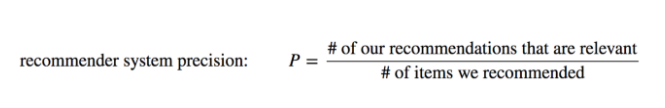

Dari 5 item yang direkomendasikan di atas, 4 item memiliki kategori authors William Faulkner (similar). Artinya, **Precision** untuk sistem yang didapatkan yaitu sebesar 4/5 atau 80%.  